In [170]:
# given the following the corresponding orthonormal basis
# (up to a constant) are the legandre polynomials

In [171]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16}) 

In [172]:
import numpy as np

In [173]:
x = np.linspace(-1,1,1000)
V = np.array([x**n for n in range(10)])

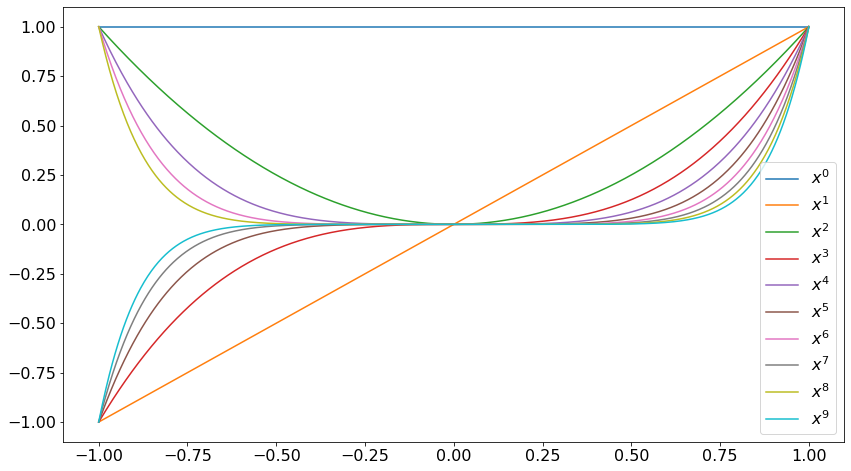

In [174]:
plt.figure(figsize=(14,8))
for n, v in enumerate(V):
    plt.plot(x, v, label=f"$x^{n}$")
plt.legend()

In [175]:
nvec, ndim = V.shape
print(f"num of vectors = {nvec}")
print(f"num of dimensions = {ndim}")

num of vectors = 10
num of dimensions = 1000


In [176]:
V.shape

(10, 1000)

In [177]:
Q, _ = np.linalg.qr(V)

In [178]:
Q.shape

(10, 10)

In [179]:
def check_condition(M):
    dim = M.shape[1]
    return np.linalg.norm(np.eye(dim) - np.dot(M.T, M))

In [180]:
def check_basis_is_orthonormal(U):
    """
    checks the basis from computed by gram-schmidt is orthonormal
    """
    Umag = np.zeros(U.shape)
    
    for i in range(U.shape[0]):
        Umag[i] = np.dot(U[i],U[i])
        np.testing.assert_array_almost_equal(1., Umag[i], err_msg=f"msg: error for index = {i}")

In [181]:
check_condition(Q)

1.3294440698473262e-15

In [182]:
check_basis_is_orthonormal(Q)

In [183]:
# for ii in range(len(Q)):
#     print([np.dot(Q[ii], Q[jj]) for jj in range(ii, len(Q))])

In [184]:
Q.shape

(10, 10)

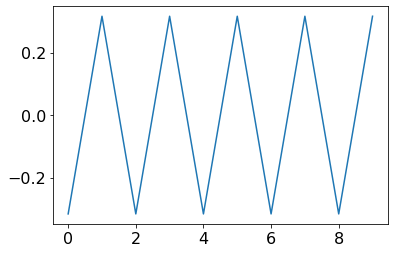

In [185]:
plt.figure()
plt.plot(Q[:,0])

In [186]:
def gs(V):
    """
    gram-schimdt algorith 
    http://iacs-courses.seas.harvard.edu/courses/am205/slides/am205_lec08.pdf
    V: numpy.ndarray
    the rows are the individual vectors
    the columns are the components of each vector
    V.shape[0] = number of vectors
    V.shape[1] = number of components === dimensionality of each vector
    
    returns:
    U: numpy.ndarray
    matrix of orthogonal vectors that space V
    """
    
    U = np.zeros(V.shape) # DON'T USERS np.zeros_like... it doesn't work!

    n_vectors = V.shape[0]
    ndim = V.shape[1]
    
    for k in range(n_vectors):
        # loop over each input vector
        ans = np.zeros(ndim) # array to store one vector i.e. a matrix of shape (1, ndim)
        for i in range(k):
            # loop over *previous* U vectors
            v = np.dot(V[k], U[i]) / np.dot(U[i], U[i]) * U[i]
            ans += v
        U[k] = V[k] - ans
    return U

def compute_Uhat(U):
    """
    given a matrix of vectors computes the unit vector for each row
    """
    n_vectors = U.shape[0]
    
    Uhat = np.zeros(U.shape)
    for k in range(n_vectors):
        dot = np.dot(U[k], U[k])
        mag = np.sqrt(dot)
        Uhat[k] = U[k] / mag
    return Uhat


Uhat = compute_Uhat(gs(V))

In [187]:
Uhat.shape

(10, 1000)

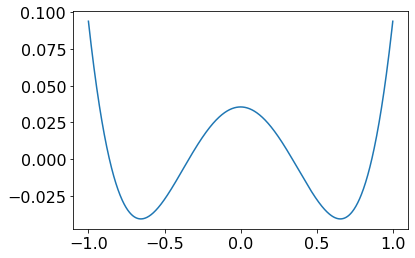

In [188]:
plt.figure()
plt.plot(x, Uhat[4])

In [189]:
check_condition(Uhat)

31.464265445104544

In [190]:
Q, R = np.linalg.qr(vectors)

In [191]:
Q.shape

(10, 10)

In [192]:
R.shape

(10, 1000)

In [193]:
Rhat = compute_Uhat(R)

In [194]:
check_condition(R)

1394.71173517287

In [195]:
check_condition(Rhat)

32.07698729118268

In [196]:
import rompy as rp

In [197]:
x = np.linspace(-1, 1, num=1000)
vectors = [x**n for n in range(10)]
integration = rp.Integration([-1, 1], num=len(x), rule='trapezoidal')

In [198]:
gramschmidt = rp.GramSchmidt(vectors, integration)
basis = gramschmidt.make()

In [199]:
basis.shape

(10, 1000)

In [200]:
Uhat.shape

(10, 1000)

In [201]:
np.linalg.norm(np.eye(1000) - np.dot(basis.T, basis))

1592.82166113187

In [202]:
check_condition(basis)

1592.82166113187

In [203]:
basis_hat = compute_Uhat(basis)

In [204]:
check_condition(basis_hat)

31.464323103508388

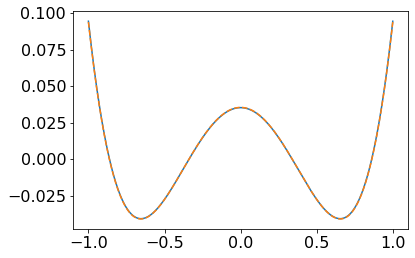

In [205]:
plt.figure()
# plt.plot(x, basis[4])
plt.plot(x, basis_hat[4])
plt.plot(x, Uhat[4], ls='--')

In [206]:
np.linalg.cond(basis)

1.027132175389888

In [207]:
np.linalg.cond(basis_hat)

1.029030982222553

In [208]:
np.linalg.cond(Uhat)

1.0000000000031648

In [209]:
def compute_svd(matrix):
    u, s, vh = np.linalg.svd(matrix, full_matrices=False)
    return u,s,vh

In [210]:
u, s, vh = compute_svd(vectors)

In [211]:
check_condition(vh)

31.464265445104544

In [212]:
vh.shape

(10, 1000)

In [213]:
np.linalg.cond(vh)

1.0000000000000018

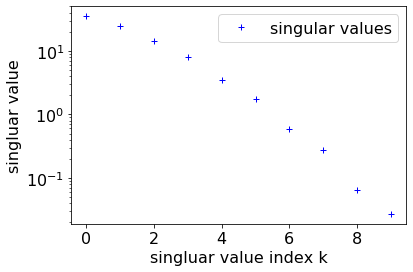

In [214]:
plt.semilogy(range(len(s)),s,'b+', label='singular values')
plt.ylabel('singluar value')
plt.xlabel('singluar value index k')
plt.legend(loc='best')

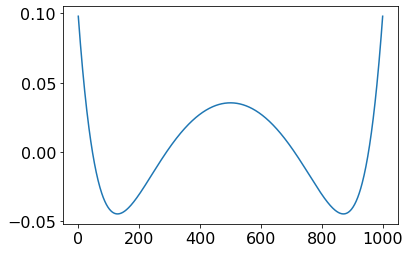

In [215]:
plt.plot(vh[4])

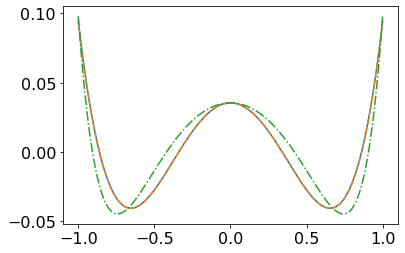

In [216]:
plt.figure()
# plt.plot(x, basis[4])
plt.plot(x, basis_hat[4])
plt.plot(x, Uhat[4], ls='--')
plt.plot(x, vh[4], ls='-.')

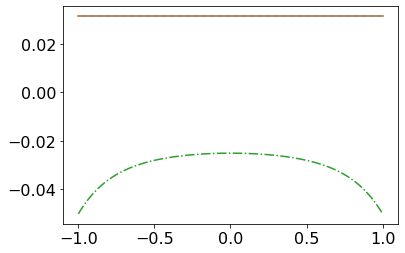

In [217]:
plt.figure()
# plt.plot(x, basis[4])
plt.plot(x, basis_hat[0])
plt.plot(x, Uhat[0], ls='--')
plt.plot(x, vh[0], ls='-.')

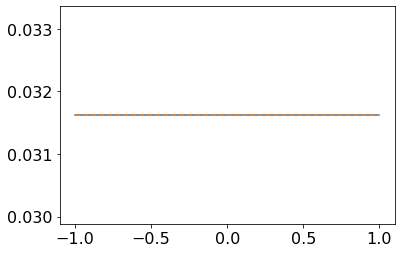

In [218]:
plt.figure()
# plt.plot(x, basis[4])
plt.plot(x, basis_hat[0])
plt.plot(x, Uhat[0], ls='--')


In [219]:
import scipy
n=1000
A = 0.00001*np.eye(n) + scipy.linalg.hilbert(n)

In [220]:
U = gs(A)

In [221]:
Uhat = compute_Uhat(U)

In [222]:
check_condition(U)

31.61235931488012

In [223]:
check_condition(Uhat)

1.9064435821889227

In [224]:
np.linalg.cond(Uhat)

2.4258340454883562

In [225]:
u, s, vh = compute_svd(A)

In [226]:
check_condition(vh)

3.7171381592604105e-14

In [227]:
np.linalg.cond(vh)

1.0000000000000027

In [228]:
def mgs(V):
    """
    modified gram-schimdt algorith 
    http://iacs-courses.seas.harvard.edu/courses/am205/slides/am205_lec08.pdf
    V: numpy.ndarray
    the rows are the individual vectors
    the columns are the components of each vector
    V.shape[0] = number of vectors
    V.shape[1] = number of components === dimensionality of each vector
    
    returns:
    U: numpy.ndarray
    matrix of orthogonal vectors that space V
    """
    
    U = np.zeros(V.shape) # DON'T USERS np.zeros_like... it doesn't work!

    n_vectors = V.shape[0]
    ndim = V.shape[1]
    
    for k in range(n_vectors):
        # loop over each input vector
        ans = np.zeros(ndim) # array to store one vector i.e. a matrix of shape (1, ndim)
        for i in range(k):
            # loop over *previous* U vectors
            v = np.dot(V[k], U[i]) / np.dot(U[i], U[i]) * U[i]
            ans += v
        U[k] = V[k] - ans
    return U
